In [135]:
import pandas as pd
import ast
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer
import datetime
import sklearn
import joblib

# BANGALORE

In [900]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\bangalore_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\bangalore_structured.csv"


In [902]:
df=pd.read_excel(input_path)

In [903]:
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [904]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
bangalore_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
bangalore_structured["City"] = "Bangalore"

# Save the dataframe to a csv file
bangalore_structured.to_csv(output_path, index=False)

print(bangalore_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

In [910]:
bangalore_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_11_value,commonIcon,top_5_key,top_5_value,data_2_list_12_key,data_2_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,235-litres,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,,Seats,5,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,5,,Seats,5,Cargo Volumn,242-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,4,,Seats,5,Cargo Volumn,407-litres,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,5,,Seats,5,Cargo Volumn,353-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore


# CHENNAI

In [912]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\chennai_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\chennai_structured.csv"

df=pd.read_excel(input_path)

In [914]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
chennai_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
chennai_structured["City"] = "Chennai"

# Save the dataframe to a csv file
chennai_structured.to_csv(output_path, index=False)

print(chennai_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Petrol        SUV  20,000    Automatic        1  1st Owner   
1      0  Petrol   Minivans  20,687       Manual        1  1st Owner   
2      0  Petrol        SUV  30,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback  59,247       Manual        1  1st Owner   
4      0  Petrol  Hatchback  50,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1414   0  Petrol  Hatchback  42,891    Automatic        1  1st Owner   
1415   0  Diesel        SUV  59,100       Manual        1  1st Owner   
1416   0  Petrol        SUV  55,913    Automatic        1  1st Owner   
1417   0  Diesel        SUV  65,000    Automatic        1  1st Owner   
1418   0  Diesel      Sedan  60,000    Automatic        1  1st Owner   

             oem              model  modelYear  ...  top_5_key top_5_value  \
0            Kia          Kia Sonet       2022  ...      

# DELHI

In [916]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\delhi_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\delhi_structured.csv"

df=pd.read_excel(input_path)

In [918]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
delhi_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
delhi_structured["City"] = "Delhi"

# Save the dataframe to a csv file
delhi_structured.to_csv(output_path, index=False)

print(delhi_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

# HYDERABAD

In [920]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\hyderabad_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\hyderabad_structured.csv"

df=pd.read_excel(input_path)

In [922]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
hyderabad_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
hyderabad_structured["City"] = "Hyberabad"

# Save the dataframe to a csv file
hyderabad_structured.to_csv(output_path, index=False)

print(hyderabad_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

# JAIPUR

In [924]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\jaipur_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\jaipur_structured.csv"

df=pd.read_excel(input_path)

In [926]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
jaipur_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
jaipur_structured["City"] = "Jaipur"

# Save the dataframe to a csv file
jaipur_structured.to_csv(output_path, index=False)

print(jaipur_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

# KOLKATA

In [928]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\kolkata_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\kolkata_structured.csv"

df=pd.read_excel(input_path)

In [930]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
kolkata_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
kolkata_structured["City"] = "Kolkata"

# Save the dataframe to a csv file
kolkata_structured.to_csv(output_path, index=False)

print(kolkata_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

In [ ]:
#Combining all structured data

In [932]:
file_paths=["C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\bangalore_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\chennai_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\delhi_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\hyderabad_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\jaipur_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\kolkata_structured.csv"]

final_df=[]

for file_path in file_paths:
    df=pd.read_csv(file_path)
    final_df.append(df)
    
final_df = pd.concat(final_df, ignore_index=True)

output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv"
final_df.to_csv(output_path, index=False)

print("sucessfully")


sucessfully


# PRE-PROCESSING

In [934]:
final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\338441427.py:1: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,234,240,242,308,309,310,311,312,313,314,315,316,317,318,319,320,321,323) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")


In [936]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [940]:
final_df.shape

(8369, 325)

In [942]:
final_df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear',
       ...
       'data_0_list_36_value', 'data_3_list_45_value', 'data_3_list_46_value',
       'data_3_list_47_value', 'data_1_list_9_key', 'data_1_list_9_value.1',
       'data_1_list_10_key', 'data_1_list_10_value.1', 'data_1_list_11_key',
       'data_1_list_11_value.1'],
      dtype='object', length=325)

In [944]:
final_df.isnull().mean()*100

it                         0.000000
ft                         0.000000
bt                         0.047795
km                         0.000000
transmission               0.000000
                            ...    
data_1_list_9_value.1     99.952205
data_1_list_10_key        99.952205
data_1_list_10_value.1    99.952205
data_1_list_11_key        99.952205
data_1_list_11_value.1    99.952205
Length: 325, dtype: float64

In [946]:
#drop columns with more than 50% nan values
threshold=len(final_df) * 0.5
final_df=final_df.dropna(thresh=threshold, axis=1)

In [948]:
final_df.shape

(8369, 215)

In [ ]:
# checking and treating missing values

In [950]:
final_df["price"].isnull().sum()

0

In [952]:
final_df.isnull().sum()

it                           0
ft                           0
bt                           4
km                           0
transmission                 0
                          ... 
data_2_list_11_value.1    3918
top_5_key.1               3243
top_5_value.2             3243
car_links                    0
City                         0
Length: 215, dtype: int64

In [954]:
final_df["bt"].value_counts()

bt
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [956]:
final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\3221153751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)


In [958]:
final_df["ownerNo"].isnull().sum()

0

In [960]:
final_df["oem"].isnull().sum()

0

In [962]:
final_df["model"].isnull().sum()

0

In [964]:
final_df["modelYear"].isnull().sum()

0

In [966]:
final_df["variantName"].isnull().sum()

0

In [968]:
final_df["top_1_value"].isnull().sum()

0

In [65]:
#coversion type for price

In [970]:
def cov_price(price):
    try:
        price_s = str(price).replace("₹","").replace(",","").strip()
        if "Lakh" in price_s:
            return float(price_s.replace("Lakh","").strip())*100000
        return float(price_s)
    except ValueError:
        return np.nan
            
        

In [972]:
final_df["price"] =final_df["price"].apply(cov_price)

In [974]:
final_df["price"].isnull().sum()

20

In [976]:
#filling missing value
final_df["price"].fillna(final_df["price"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1865049444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["price"].fillna(final_df["price"].median(),inplace=True)


In [978]:
final_df["price"].isnull().sum()

0

In [980]:
#changing km into kms
final_df["km"] =final_df["km"].str.replace("kms","").str.replace(",","").astype(float)

In [982]:
final_df["km"].isnull().sum()

0

In [984]:
#clean mileage from top_0_value.2
def car_mileage(mileage):
    try:
        mileage_s = str(mileage).replace("kmpl","").replace("km/mg","").strip()
        mileage_float= float(mileage_s)
        if mileage_float <100:
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

In [986]:
final_df["mileage"] =final_df["top_0_value.2"].apply(car_mileage)

In [988]:
final_df["mileage"].isnull().mean()*100

3.847532560640459

In [990]:
final_df["mileage"].info

<bound method Series.info of 0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: mileage, Length: 8369, dtype: float64>

In [992]:
#replacing null value with mean value
final_df["mileage"].fillna(final_df["mileage"].mean(),inplace=True)

In [994]:
final_df["mileage"].isnull().mean()*100

0.0

In [428]:
#clean seat from top_3_value

# def car_seats(seats):
#     try:
#         seat_s=str(seats).replace("seats","").strip()
#         seats_int = int(seats)
#         if seats_int <10:   
#             return seats_int
#         else:
#             return np.nan
#     except (ValueError,TypeError):
#         return np.nan

In [468]:
#final_df["top_3_value"]=final_df["top_3_value"].astype(str).str.replace("seats","")

In [996]:
def car_seats(seats):
    try:
        seat_s = re.search(r'\d+', str(seats))
        if seat_s:
            seats_int = int(seat_s.group())
            if seats_int < 10:
                return seats_int
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan
        

In [1000]:
final_df["seats"]=final_df["top_3_value"].apply(car_seats)

In [1002]:
final_df["seats"].isnull().sum()

50

In [1004]:
final_df["seats"].value_counts()

seats
5.0    7309
7.0     731
6.0      99
4.0      92
8.0      61
9.0      11
1.0       9
2.0       7
Name: count, dtype: int64

In [1006]:
#replacing null value with mode value
final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1965945630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)


In [1008]:
final_df["seats"].isnull().sum()

0

In [1010]:
#dropping top_3_value and top_0_value.2
final_df.drop(["top_3_value","top_0_value.2"],axis=1,inplace=True)

In [1012]:
# dropping the repeated column owner
final_df.drop("owner",axis=1,inplace=True)

In [1014]:
#changing column name
final_df["Insurance Validity"] =final_df["top_1_value"]

In [1016]:
final_df["Insurance Validity"]

0       Third Party insurance
1               Comprehensive
2               Comprehensive
3               Comprehensive
4       Third Party insurance
                ...          
8364    Third Party insurance
8365    Third Party insurance
8366    Third Party insurance
8367    Third Party insurance
8368    Third Party insurance
Name: Insurance Validity, Length: 8369, dtype: object

In [1018]:
#dropping column
final_df.drop("top_1_value",axis=1,inplace=True)

In [1020]:
final_df["Insurance Validity"].isnull().sum()

0

# ENCODING

In [1022]:
#label encoding

categorical_columns = ["ft","bt","transmission","oem","model","variantName","Insurance Validity","City"]

le = LabelEncoder()

In [1024]:
final_df[categorical_columns].select_dtypes(include=["object"]).columns

Index(['ft', 'bt', 'transmission', 'oem', 'model', 'variantName',
       'Insurance Validity', 'City'],
      dtype='object')

In [1026]:
for i in final_df[categorical_columns].select_dtypes(include=["object"]).columns:
    final_df[i]=le.fit_transform(final_df[i])
    

In [1028]:
final_df[categorical_columns]


,ft,bt,transmission,oem,model,variantName,Insurance Validity,City
0,4,2,1,20,160,1806,8,0
1,4,7,1,6,50,288,2,0
2,4,2,1,29,273,129,2,0
3,4,8,1,9,87,101,2,0
4,1,7,1,20,178,987,8,0
...,...,...,...,...,...,...,...,...
8364,4,2,1,20,160,2051,8,5
8365,4,2,1,20,155,1268,8,5
8366,4,8,0,21,197,891,8,5
8367,4,2,1,20,175,2069,8,5


In [1030]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,4,2,120000.0,1,3,20,160,2015,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,23.10,5.0,8
1,0,4,7,32706.0,1,2,6,50,2018,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,17.00,5.0,2
2,0,4,2,11949.0,1,1,29,273,2018,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,23.84,5.0,2
3,0,4,8,17794.0,1,1,9,87,2014,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,19.10,5.0,2
4,0,1,7,60000.0,1,1,20,178,2015,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,23.65,5.0,8


In [1032]:
#min-max scaler
mm =MinMaxScaler()

In [1034]:
final_df[["km","modelYear","ownerNo","mileage","seats","price"]]=mm.fit_transform(final_df[["km","modelYear","ownerNo","mileage","seats","price"]])

In [1036]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.593993,0.5,8
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.367816,0.5,2
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.621431,0.5,2
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.445680,0.5,2
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.614386,0.5,8


In [1038]:
final_df["km"].min()

0.0

In [1040]:
final_df["km"].max()

1.0

In [1042]:
final_df["km"].mean()

0.01072260044102152

# OUTLIERS

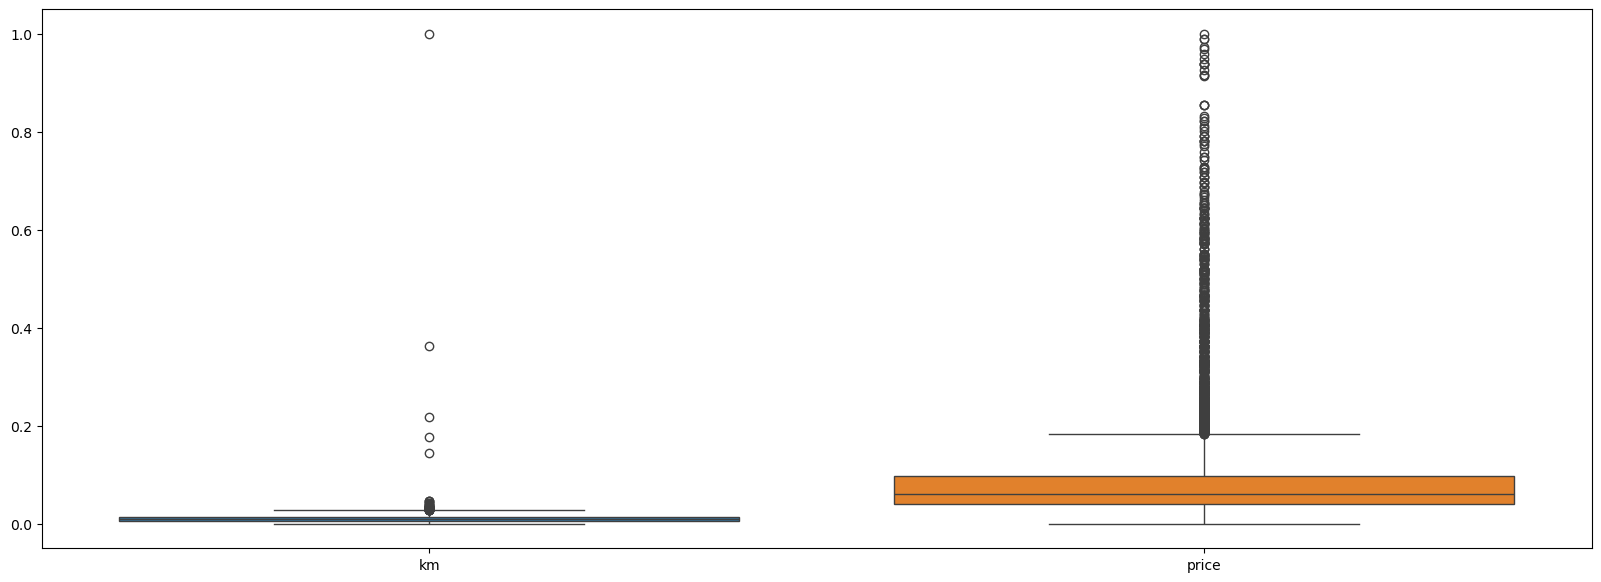

In [1044]:
plt.figure(figsize=(20,7))
sns.boxplot(data=final_df[["km","price"]])
plt.show()

In [1046]:
def outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR = q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return df[(df[column]>=lower)&(df[column]<=upper)]
kilo =outliers(final_df,"km")
price=outliers(kilo,"price")
final_df=price

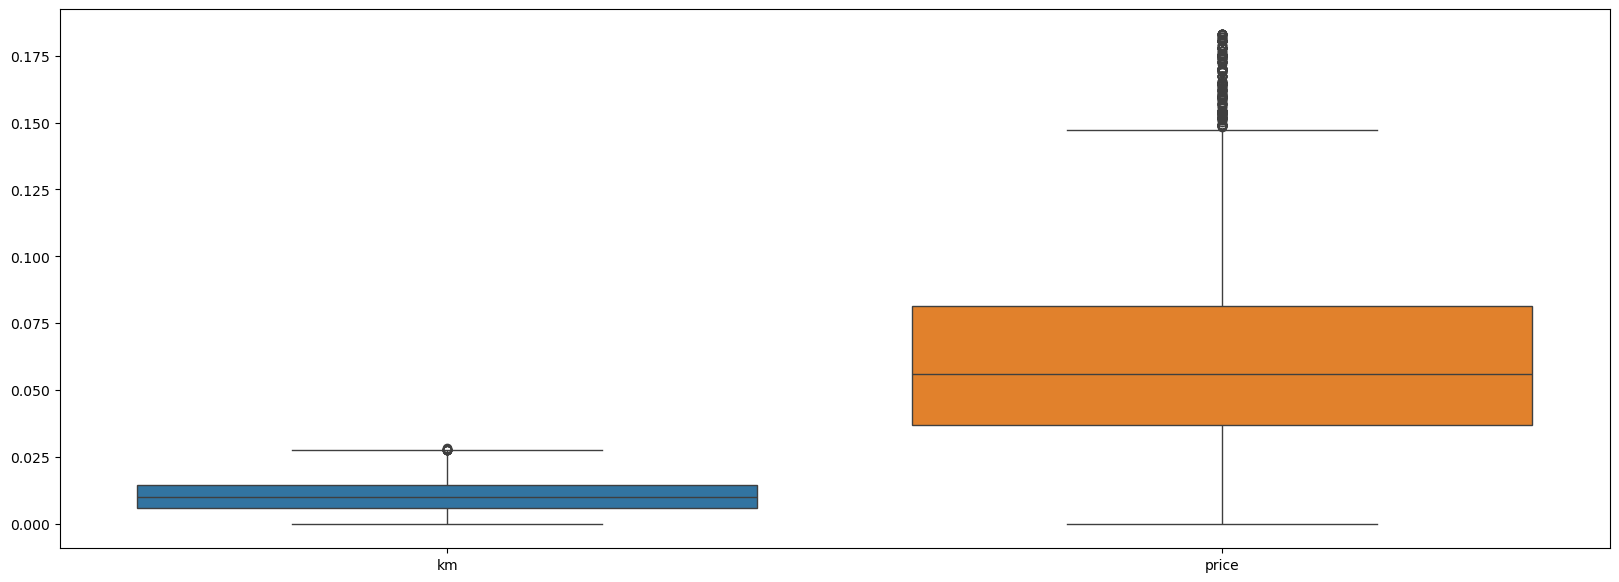

In [1048]:
plt.figure(figsize=(20,7))
sns.boxplot(data=final_df[["km","price"]])
plt.show()

In [1050]:
final_df[["km","price"]].describe()

,km,price
count,7467.000000,7467.000000
mean,0.010719,0.063461
std,0.005992,0.037384
min,0.000000,0.000000
25%,0.005937,0.037040
50%,0.010167,0.055830
75%,0.014545,0.081404
max,0.028169,0.183180


In [786]:
#saving the pre-processed file

In [1052]:
output_file= "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv"
final_df.to_csv(output_file,index=False)

# ONLY DATA CLEANING

In [1054]:
final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\338441427.py:1: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,234,240,242,308,309,310,311,312,313,314,315,316,317,318,319,320,321,323) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")


In [1056]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1058]:
final_df.shape

(8369, 325)

In [1060]:
final_df.isnull().mean()*100

it                         0.000000
ft                         0.000000
bt                         0.047795
km                         0.000000
transmission               0.000000
                            ...    
data_1_list_9_value.1     99.952205
data_1_list_10_key        99.952205
data_1_list_10_value.1    99.952205
data_1_list_11_key        99.952205
data_1_list_11_value.1    99.952205
Length: 325, dtype: float64

In [1062]:
#drop columns with more than 50% nan values
threshold=len(final_df) * 0.5
final_df=final_df.dropna(thresh=threshold, axis=1)

In [1064]:
final_df.shape

(8369, 215)

In [1066]:
# checking and treating missing values
final_df.isnull().sum()


it                           0
ft                           0
bt                           4
km                           0
transmission                 0
                          ... 
data_2_list_11_value.1    3918
top_5_key.1               3243
top_5_value.2             3243
car_links                    0
City                         0
Length: 215, dtype: int64

In [1068]:
final_df["bt"].value_counts()

bt
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [1070]:
final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\3221153751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)


In [1072]:
final_df["ownerNo"].isnull().sum()

0

In [1074]:
final_df["oem"].isnull().sum()

0

In [1076]:
final_df["model"].isnull().sum()

0

In [1078]:
final_df["modelYear"].isnull().sum()

0

In [822]:
final_df["variantName"].isnull().sum()

0

In [1080]:
final_df["top_1_value"].isnull().sum()

0

In [826]:
#coversion type for price

In [1082]:
def cov_price(price):
    try:
        price_s = str(price).replace("₹","").replace(",","").strip()
        if "Lakh" in price_s:
            return float(price_s.replace("Lakh","").strip())*100000
        return float(price_s)
    except ValueError:
        return np.nan

In [1084]:
final_df["price"] =final_df["price"].apply(cov_price)

In [1086]:
final_df["price"].isnull().sum()

20

In [1088]:
#filling missing value
final_df["price"].fillna(final_df["price"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1865049444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["price"].fillna(final_df["price"].median(),inplace=True)


In [1090]:
final_df["price"].isnull().sum()

0

In [1092]:
#changing km into kms
final_df["km"] =final_df["km"].str.replace("kms","").str.replace(",","").astype(float)

In [1094]:
final_df["km"].isnull().sum()

0

In [1096]:
#clean mileage from top_0_value.2
def car_mileage(mileage):
    try:
        mileage_s = str(mileage).replace("kmpl","").replace("km/mg","").strip()
        mileage_float= float(mileage_s)
        if mileage_float <100:
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

In [1098]:
final_df["mileage"] =final_df["top_0_value.2"].apply(car_mileage)

In [1100]:
final_df["mileage"].isnull().mean()*100

3.847532560640459

In [1102]:
#replacing null value with mean value
final_df["mileage"].fillna(final_df["mileage"].mean(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\676305924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["mileage"].fillna(final_df["mileage"].mean(),inplace=True)


In [1104]:
final_df["mileage"].isnull().mean()*100

0.0

In [1106]:
#changing seat into int
def car_seats(seats):
    try:
        seat_s = re.search(r'\d+', str(seats))
        if seat_s:
            seats_int = int(seat_s.group())
            if seats_int < 10:
                return seats_int
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan
        

In [1108]:
final_df["seats"]=final_df["top_3_value"].apply(car_seats)

In [1110]:
final_df["seats"].value_counts()

seats
5.0    7309
7.0     731
6.0      99
4.0      92
8.0      61
9.0      11
1.0       9
2.0       7
Name: count, dtype: int64

In [1112]:
#replacing null value with mode value
final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1965945630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)


In [1114]:
final_df["seats"].isnull().sum()

0

In [1116]:
#dropping top_3_value and top_0_value.2
final_df.drop(["top_3_value","top_0_value.2"],axis=1,inplace=True)

In [1118]:
# dropping the repeated column owner
final_df.drop("owner",axis=1,inplace=True)

In [1124]:
#changing column name
final_df["Insurance Validity"] =final_df["top_1_value"]

In [1126]:
final_df["Insurance Validity"]

0       Third Party insurance
1               Comprehensive
2               Comprehensive
3               Comprehensive
4       Third Party insurance
                ...          
8364    Third Party insurance
8365    Third Party insurance
8366    Third Party insurance
8367    Third Party insurance
8368    Third Party insurance
Name: Insurance Validity, Length: 8369, dtype: object

In [1128]:
#dropping column
final_df.drop("top_1_value",axis=1,inplace=True)

In [1130]:
final_df["Insurance Validity"].isnull().sum()

0

In [1132]:
output_file= "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\data_cleaning.csv"
final_df.to_csv(output_file,index=False)

# DATA VISUALIZATION

In [35]:
processed_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_11536\3523466905.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  processed_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv")


In [37]:
processed_df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.593993,0.5,8
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.367816,0.5,2
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.621431,0.5,2
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.445680,0.5,2
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.614386,0.5,8


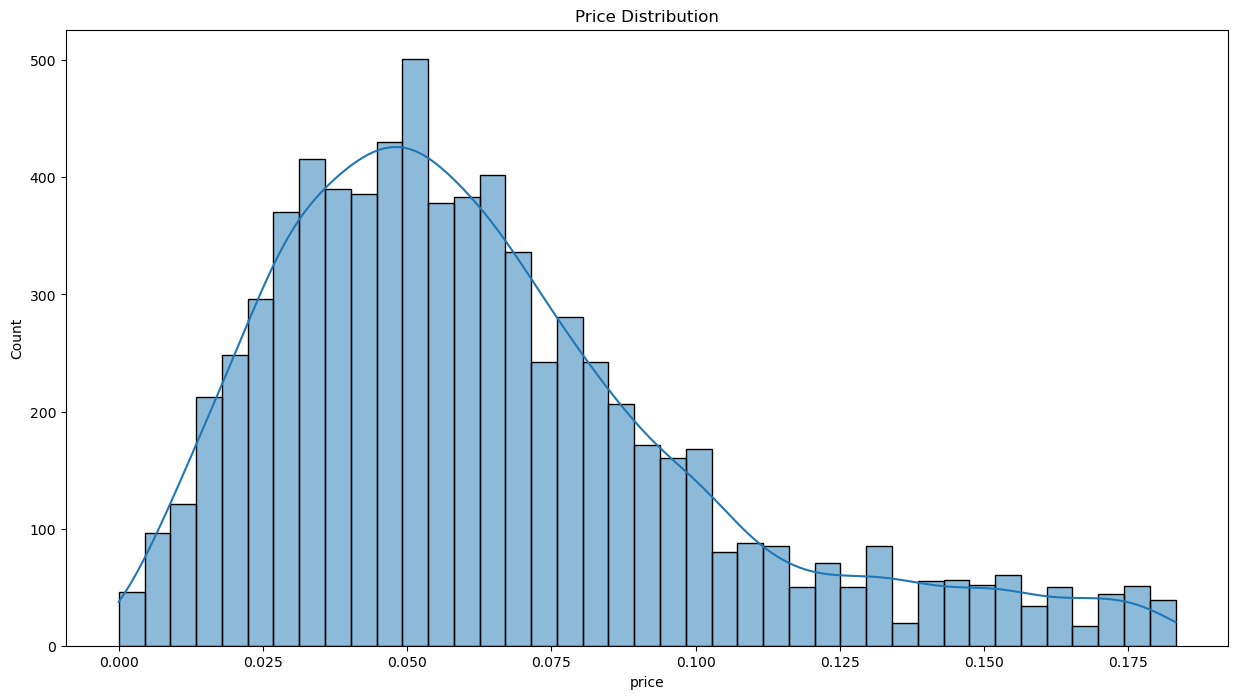

In [41]:
#histogram for price distribution
plt.figure(figsize=(15,8))
sns.histplot(processed_df["price"],kde=True)
plt.title("Price Distribution")
plt.show()


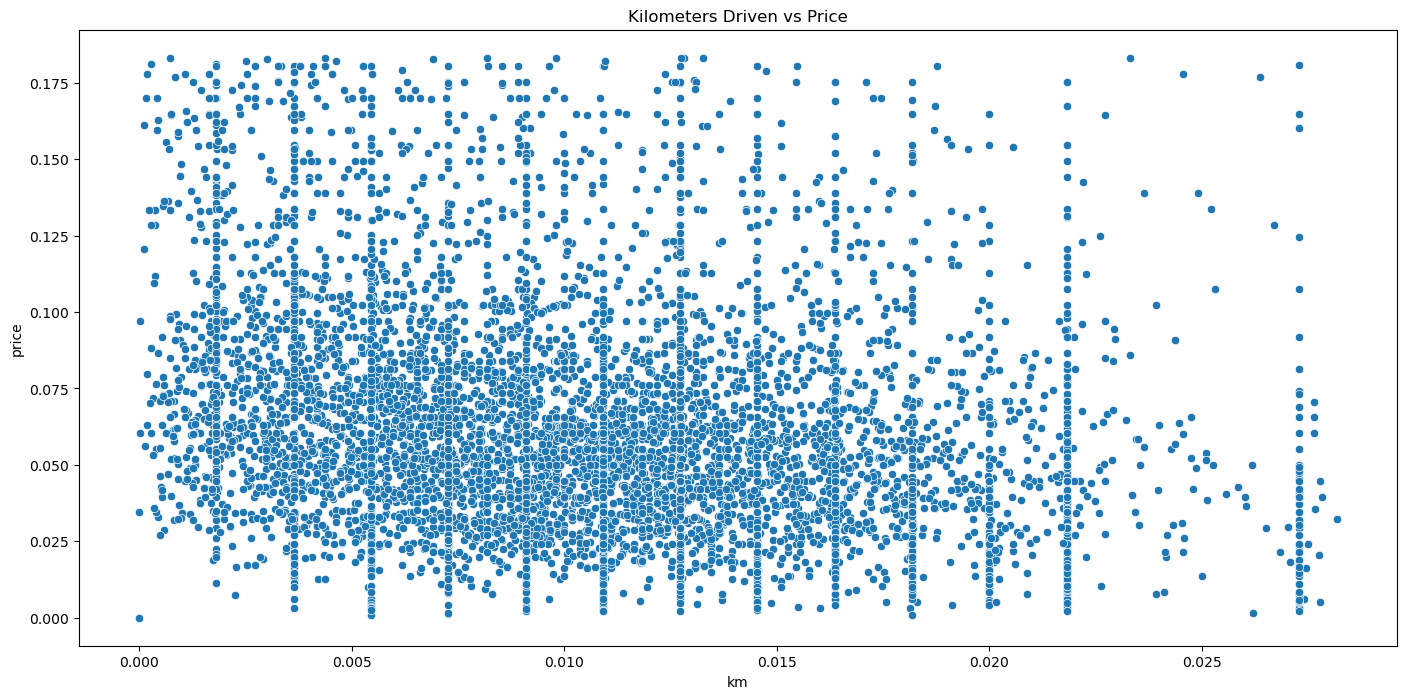

In [45]:
#scatterplot for km vs price
plt.figure(figsize=(17, 8))
sns.scatterplot(data=processed_df,x="km",y="price")
plt.title("Kilometers Driven vs Price")
plt.show()

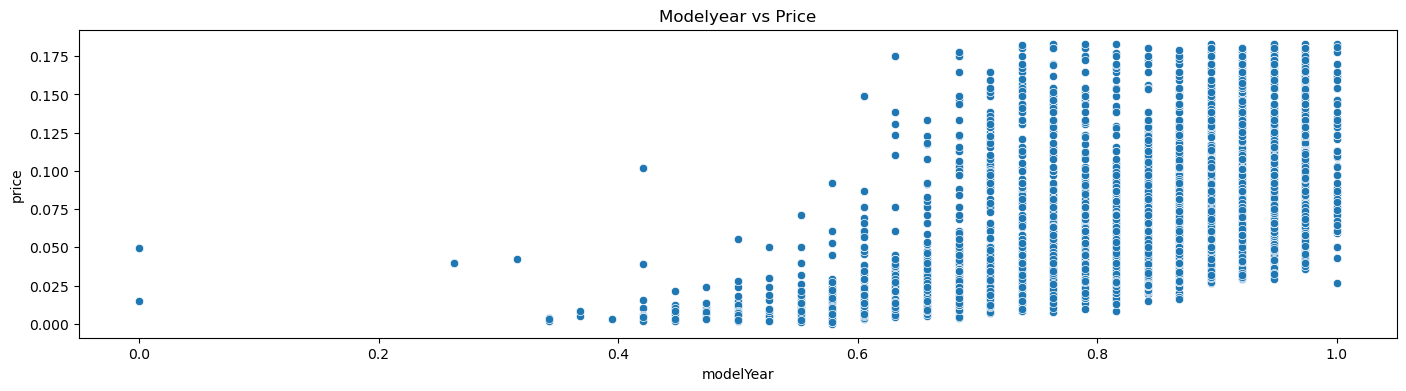

In [43]:
#modelyear vs Price
plt.figure(figsize=(17, 4))
sns.scatterplot(data=processed_df,x="modelYear",y="price")
plt.title("Modelyear vs Price")
plt.show()

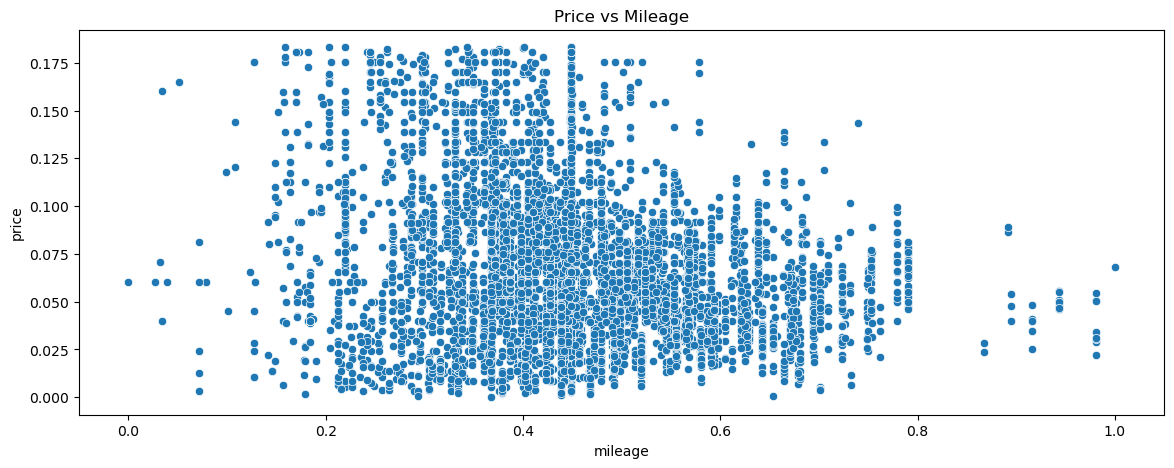

In [66]:
#scatterplot price vs mileage

plt.figure(figsize=(14, 5))
sns.scatterplot(data=processed_df,x="mileage", y="price",)
plt.title("Price vs Mileage")
plt.show()

In [76]:
#heatmap
data_corr =processed_df.select_dtypes(include=["int64","float64"])

In [90]:
data_corr= data_corr.corr()

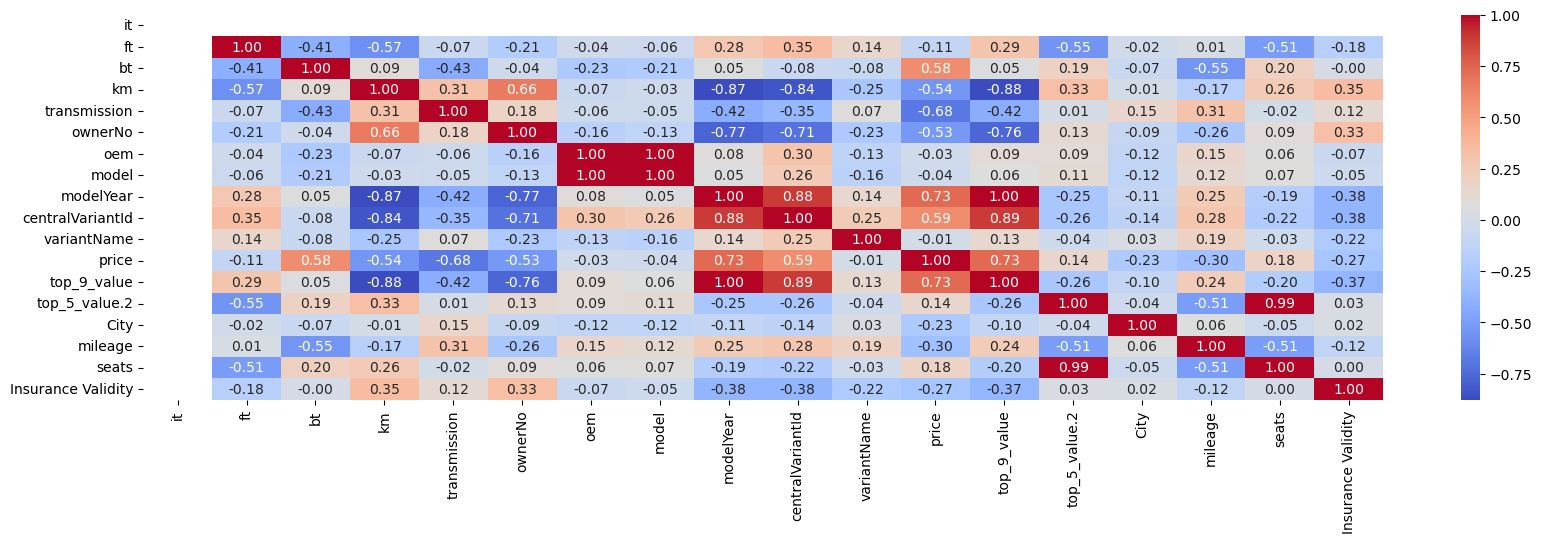

In [94]:
plt.figure(figsize=(20,5))
sns.heatmap(data=data_corr.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

# ML MODEL

In [6]:
# getting feature score

In [139]:
df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_2960\2547880348.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv")


In [141]:
df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.593993,0.5,8
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.367816,0.5,2
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.621431,0.5,2
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.445680,0.5,2
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.614386,0.5,8


In [143]:
var=df[["ft","bt","km","transmission","ownerNo","oem","model","modelYear","variantName","City","mileage","seats","Insurance Validity"]]
tar= df["price"]

In [145]:
fs= RandomForestRegressor(n_estimators=200,random_state=45)

In [147]:
fs.fit(var,tar)

RandomForestRegressor(n_estimators=200, random_state=45)

In [148]:
fs.feature_importances_

array([0.0348602 , 0.26504304, 0.02945825, 0.06993019, 0.00567319,
       0.02576622, 0.06871827, 0.30138414, 0.0585174 , 0.02798028,
       0.09764558, 0.00956152, 0.00546172])

In [151]:
fs_score=pd.DataFrame({
    "columns":var.columns,
    "score":fs.feature_importances_
}).sort_values("score",ascending=False).head(8)

In [2118]:
fs_score

,columns,score
7,modelYear,0.301384
1,bt,0.265043
10,mileage,0.097646
3,transmission,0.069930
6,model,0.068718
8,variantName,0.058517
0,ft,0.034860
2,km,0.029458


In [153]:
list(fs_score.sort_values("score",ascending=False).head(8)["columns"].values)

['modelYear',
 'bt',
 'mileage',
 'transmission',
 'model',
 'variantName',
 'ft',
 'km']

In [155]:
selected_features =list(fs_score.sort_values("score",ascending=False).head(8)["columns"].values)

In [157]:
var = var[selected_features]

In [161]:
model_data=pd.concat([var,tar],axis=1)

In [165]:
#saving for future uses
output_file= "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\selected_features.csv"
model_data.to_csv(output_file,index=False)

In [167]:
data = var.corr()

In [169]:
data.head()

,modelYear,bt,mileage,transmission,model,variantName,ft,km
modelYear,1.000000,0.051580,0.208168,-0.132541,0.082611,0.090707,0.098852,-0.525230
bt,0.051580,1.000000,-0.316806,-0.163354,-0.062757,0.031299,-0.268432,0.092623
mileage,0.208168,-0.316806,1.000000,0.186019,0.069722,0.123834,-0.190262,-0.027623
transmission,-0.132541,-0.163354,0.186019,1.000000,0.013551,0.087766,-0.042369,0.107678
model,0.082611,-0.062757,0.069722,0.013551,1.000000,-0.017795,-0.056271,0.013772


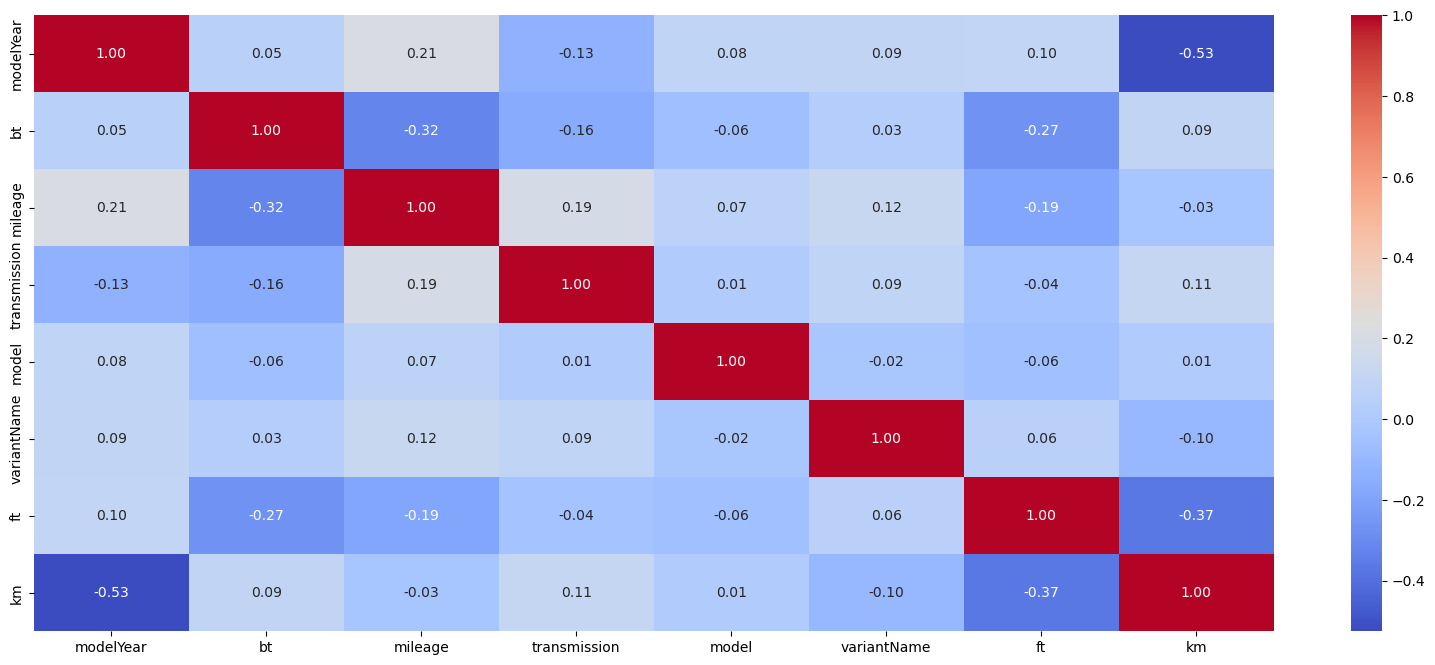

In [2137]:
#feature selection univariate 
plt.figure(figsize=(20,8))
sns.heatmap(data=data,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [171]:
print("NO FEATURES ARE CORRELATED ABOVE 70% SO WE TAKING ALL COLUMNS FOR ML MODEL")

NO FEATURES ARE CORRELATED ABOVE 70% SO WE TAKING ALL COLUMNS FOR ML MODEL


In [173]:
#train,test split
train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=45)

In [175]:
train_data.shape

(5973, 8)

In [177]:
test_data.shape

(1494, 8)

# linear regression model building

In [2147]:
#initialization

model=LinearRegression() 

In [2149]:
model.fit(train_data,train_lab)

LinearRegression()

In [2151]:
#predicting for training and test

In [2153]:
predicting_value=model.predict(test_data)

In [2155]:
predicting_value

array([0.04578053, 0.09264144, 0.10814587, ..., 0.07039769, 0.08109428,
       0.04663834])

In [153]:
#measuring performance

In [2157]:
predict_train = model.predict(train_data)

In [2159]:
mean_squared_error(train_lab,predict_train)

0.0005020646266511388

In [2161]:
mean_absolute_error(train_lab,predict_train)

0.016573480357732633

In [2163]:
r2_score(train_lab,predict_train)

0.6418464778695165

In [2165]:
print(f"mean_squared_error:{mean_squared_error(train_lab,predict_train)}")
print(f"mean_absolute_error:{mean_absolute_error(train_lab,predict_train)}")
print(f"r2_score:{r2_score(train_lab,predict_train)}")

mean_squared_error:0.0005020646266511388
mean_absolute_error:0.016573480357732633
r2_score:0.6418464778695165


In [2167]:
predict_test = model.predict(test_data)

In [2169]:
mean_squared_error(test_lab,predict_test)

0.00047384007900952446

In [2171]:
mean_absolute_error(test_lab,predict_test)

0.015955263284478917

In [2173]:
r2_score(test_lab,predict_test)

0.6563682861053308

In [2175]:
print(f"mean_squared_error:{mean_squared_error(test_lab,predict_test)}")
print(f"mean_absolute_error:{mean_absolute_error(test_lab,predict_test)}")
print(f"r2_score:{r2_score(test_lab,predict_test)}")

mean_squared_error:0.00047384007900952446
mean_absolute_error:0.015955263284478917
r2_score:0.6563682861053308


In [2177]:
metrics = {
    "mean squared error":[mean_squared_error(train_lab,predict_train), mean_squared_error(test_lab,predict_test)],
    "mean absolute error":[mean_absolute_error(train_lab,predict_train), mean_absolute_error(test_lab,predict_test)],
    "r2 score":[r2_score(train_lab,predict_train), r2_score(test_lab,predict_test)],
}

In [2179]:
Linear_regression=pd.DataFrame(metrics,index=["Training","Testing"])

In [2181]:
Linear_regression

,mean squared error,mean absolute error,r2 score
Training,0.000502,0.016573,0.641846
Testing,0.000474,0.015955,0.656368


In [173]:
#predicting manual

In [237]:
#model_data.head()

In [95]:
#model_data.iloc[[2000]]

In [97]:
#model_data.iloc[[2000]].drop("price",axis=1)

In [99]:
#model.predict(model_data.loc[[2000]].drop("price",axis=1))

In [101]:
#model_data.iloc[[450]]

In [103]:
#model_data.iloc[[450]].drop("price",axis=1)

In [105]:
#model.predict(model_data.loc[[450]].drop("price",axis=1))

In [2183]:
reg_model=pd.DataFrame({
    "actual price":test_lab,
    "predicted price":predicting_value
})

In [93]:
reg_model.head()

,actual price,predicted price
4238,0.043930,0.045781
1495,0.096018,0.092641
6675,0.110423,0.108146
4710,0.045600,0.069753
3588,0.039545,0.044076


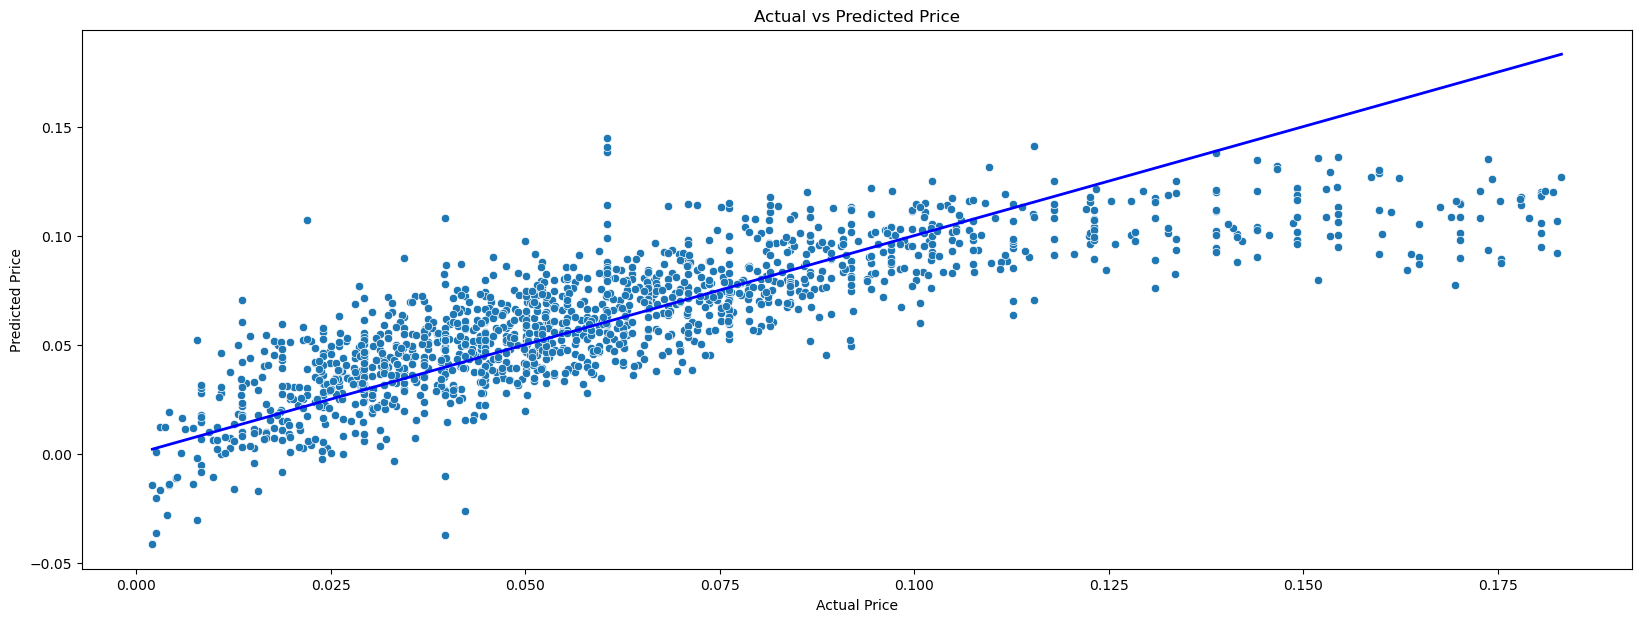

In [2185]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=test_lab,y=predicting_value)
plt.plot([test_lab.min(),test_lab.max()],[test_lab.min(),test_lab.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [117]:
#Regularization

In [119]:
#lasso

In [2187]:
lasso_model= Lasso(alpha=0.01)

In [2189]:
lasso_model.fit(train_data,train_lab)

Lasso(alpha=0.01)

In [2191]:
lasso_train_predict= lasso_model.predict(train_data)
lasso_test_predict= lasso_model.predict(test_data)

In [2193]:
mean_squared_error(train_lab,lasso_train_predict)

0.0011532790039004727

In [2195]:
mean_squared_error(test_lab,lasso_test_predict)

0.0011499548498699985

In [2197]:
mean_absolute_error(train_lab,lasso_train_predict)

0.025808241349937477

In [2199]:
mean_absolute_error(test_lab,lasso_test_predict)

0.025829330252987236

In [2201]:
r2_score(train_lab,lasso_train_predict)

0.17729528168273134

In [2203]:
r2_score(test_lab,lasso_test_predict)

0.16604573258487154

In [135]:
#RIDGE

In [2205]:
ridge_model= Ridge(alpha=0.0099)
ridge_model.fit(train_data,train_lab)

Ridge(alpha=0.0099)

In [2207]:
ridge_train_predict =ridge_model.predict(train_data)
ridge_test_predict =ridge_model.predict(test_data)

In [2209]:
mean_squared_error(train_lab,ridge_train_predict)

0.0005020881284247222

In [2211]:
mean_squared_error(test_lab,ridge_test_predict)

0.000473820514453424

In [2213]:
mean_absolute_error(train_lab,ridge_train_predict)

0.016570203947363103

In [2215]:
mean_absolute_error(test_lab,ridge_test_predict)

0.015948688090838575

In [2217]:
r2_score(train_lab,ridge_train_predict)

0.6418297126115431

In [2219]:
r2_score(test_lab,ridge_test_predict)

0.6563824744406832

In [2221]:
metrics = {
    "mean squared error":[mean_squared_error(train_lab,ridge_train_predict), mean_squared_error(test_lab,ridge_test_predict)],
    "mean absolute error":[mean_absolute_error(train_lab,ridge_train_predict), mean_absolute_error(test_lab,ridge_test_predict)],
    "r2 score":[r2_score(train_lab,ridge_train_predict), r2_score(test_lab,ridge_test_predict)],
}

In [2223]:
pd.DataFrame(metrics,index=["training","testing"])

,mean squared error,mean absolute error,r2 score
training,0.000502,0.016570,0.641830
testing,0.000474,0.015949,0.656382


# decision tree

In [2225]:
var.head()   

,modelYear,bt,mileage,transmission,model,variantName,ft,km
0,0.789474,2,0.593993,1,160,1806,4,0.021818
1,0.868421,7,0.367816,1,50,288,4,0.005947
2,0.868421,2,0.621431,1,273,129,4,0.002173
3,0.763158,8,0.445680,1,87,101,4,0.003235
4,0.789474,7,0.614386,1,178,987,1,0.010909


In [2227]:
tar.head()   #target is price

0    0.039650
1    0.082552
2    0.058961
3    0.046122
4    0.080360
Name: price, dtype: float64

In [2229]:
#training and training split
train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=35)

In [2231]:
train_data.shape

(5973, 8)

In [2233]:
test_data.shape

(1494, 8)

In [2235]:
dt_model= DecisionTreeRegressor(max_depth=5,random_state=35)

In [2237]:
dt_model.fit(train_data,train_lab)

DecisionTreeRegressor(max_depth=5, random_state=35)

In [2239]:
dttrain_predict = dt_model.predict(train_data)

In [2241]:
dttest_predict = dt_model.predict(test_data)

In [2243]:
mean_squared_error(train_lab,dttrain_predict)

0.00044532011086438183

In [2245]:
mean_squared_error(test_lab,dttest_predict)

0.0004988938121974362

In [2247]:
mean_absolute_error(train_lab,dttrain_predict)

0.015167202523569226

In [2249]:
mean_absolute_error(test_lab,dttest_predict)

0.01578778074237774

In [2251]:
r2_score(train_lab,dttrain_predict)

0.6797027308118584

In [2253]:
r2_score(test_lab,dttest_predict)

0.6493818055772347

In [2255]:
metrics={
    "mean_squared_error":[mean_squared_error(train_lab,dttrain_predict),mean_squared_error(test_lab,dttest_predict)],
    "mean_absolute_error":[mean_absolute_error(train_lab,dttrain_predict),mean_absolute_error(test_lab,dttest_predict)],
    "r2_score":[r2_score(train_lab,dttrain_predict),r2_score(test_lab,dttest_predict)]
}

In [2257]:
Decision_tree=pd.DataFrame(metrics,index=["training","testing"])

In [2259]:
Decision_tree

,mean_squared_error,mean_absolute_error,r2_score
training,0.000445,0.015167,0.679703
testing,0.000499,0.015788,0.649382


In [346]:
#cross-validation

In [2261]:
cv_score=cross_val_score(dt_model,train_data,train_lab,cv=5,scoring="neg_mean_squared_error")

In [2263]:
mean_mse =-cv_score.mean()

In [2265]:
print(f"dt cv mean MSE: {mean_mse:.6f}")

dt cv mean MSE: 0.000491


In [ ]:
#Since the cross-validated MSE is slightly lower than the training MSE, this indicates that the model is not overfitting significantly

# Random forest regressor

In [179]:
var.head()

,modelYear,bt,mileage,transmission,model,variantName,ft,km
0,0.789474,2,0.593993,1,160,1806,4,0.021818
1,0.868421,7,0.367816,1,50,288,4,0.005947
2,0.868421,2,0.621431,1,273,129,4,0.002173
3,0.763158,8,0.445680,1,87,101,4,0.003235
4,0.789474,7,0.614386,1,178,987,1,0.010909


In [181]:
rf=RandomForestRegressor(n_estimators=200,max_depth=5,random_state=45)

In [183]:
#train and test splitting
train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=45)

In [185]:
train_data.shape

(5973, 8)

In [187]:
test_data.shape

(1494, 8)

In [189]:
random_model = fs.fit(train_data,train_lab)

In [190]:
random_train_predict = random_model.predict(train_data)
random_test_predict = random_model.predict(test_data)

In [191]:
mean_squared_error(train_lab,random_train_predict)

2.6994708715317643e-05

In [192]:
mean_squared_error(test_lab,random_test_predict)

0.00017028534779891044

In [197]:
mean_absolute_error(train_lab,random_train_predict)

0.003425498418738464

In [199]:
mean_absolute_error(test_lab,random_test_predict)

0.00890676527018844

In [201]:
r2_score(train_lab,random_train_predict)

0.980743016950295

In [203]:
r2_score(test_lab,random_test_predict)

0.87650802769237

In [205]:
metrics={
    "mean_squared_error":[mean_squared_error(train_lab,random_train_predict),mean_squared_error(test_lab,random_test_predict)],
    "mean_absolute_error":[mean_absolute_error(train_lab,random_train_predict),mean_absolute_error(test_lab,random_test_predict)],
    "r2_score":[r2_score(train_lab,random_train_predict),r2_score(test_lab,random_test_predict)]
}

In [207]:
Random_forest=pd.DataFrame(metrics,index=["training","testing"])

In [209]:
Random_forest

,mean_squared_error,mean_absolute_error,r2_score
training,0.000027,0.003425,0.980743
testing,0.000170,0.008907,0.876508


In [1303]:
#hyperparameter tuning

In [1307]:
parameter_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [1309]:
grid_search=GridSearchCV(RandomForestRegressor(),parameter_grid,cv=3,scoring="r2")
grid_search.fit(train_data,train_lab)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [1311]:
print("Best parameters:",grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


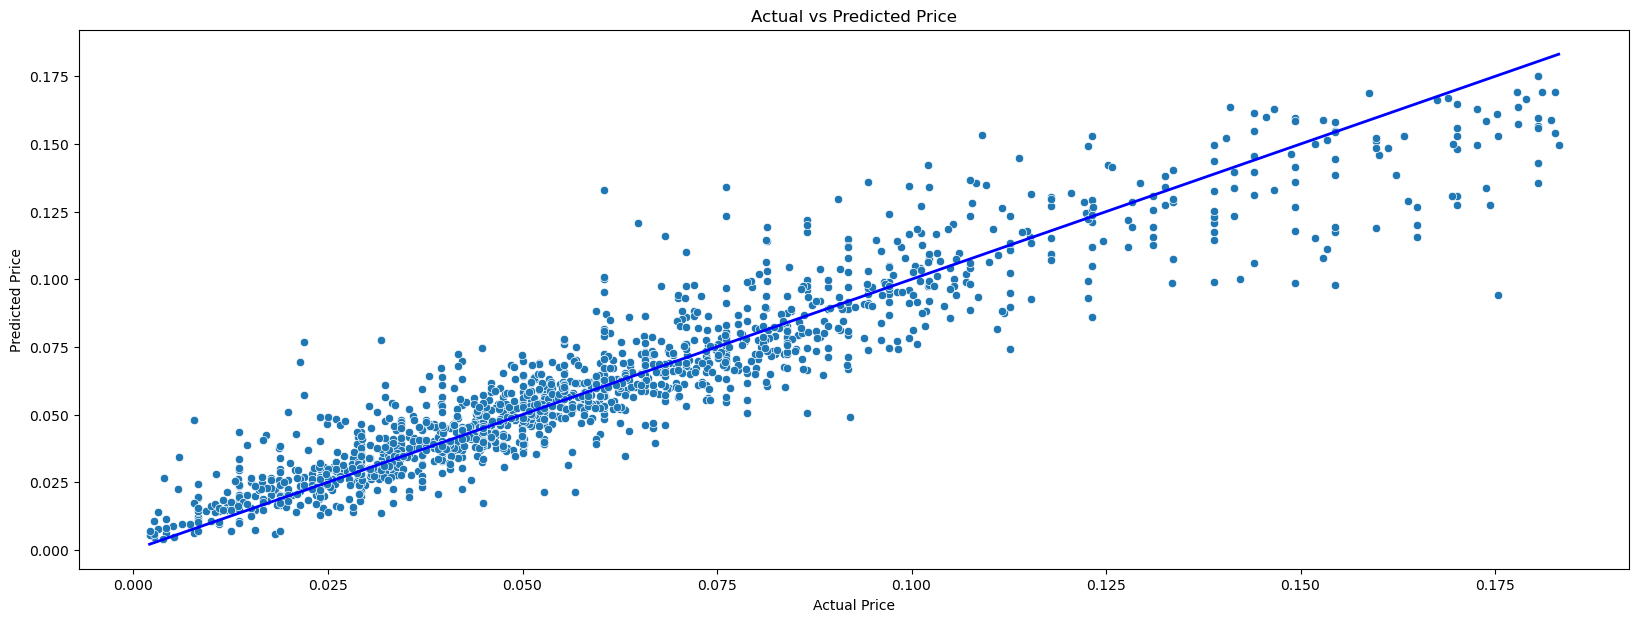

In [211]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=test_lab,y=random_test_predict)
plt.plot([test_lab.min(),test_lab.max()],[test_lab.min(),test_lab.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

# Gradient boosting

In [2301]:
var.head()

,modelYear,bt,mileage,transmission,model,variantName,ft,km
0,0.789474,2,0.593993,1,160,1806,4,0.021818
1,0.868421,7,0.367816,1,50,288,4,0.005947
2,0.868421,2,0.621431,1,273,129,4,0.002173
3,0.763158,8,0.445680,1,87,101,4,0.003235
4,0.789474,7,0.614386,1,178,987,1,0.010909


In [2303]:
tar.head()

0    0.039650
1    0.082552
2    0.058961
3    0.046122
4    0.080360
Name: price, dtype: float64

In [2312]:
gb= GradientBoostingRegressor()

In [2314]:
gb.fit(train_data,train_lab)

GradientBoostingRegressor()

In [2316]:
gb_train_predict=gb.predict(train_data)
gb_test_predict=gb.predict(test_data)

In [2318]:
metrics={
    "mean_squared_error":[mean_squared_error(train_lab,gb_train_predict),mean_squared_error(test_lab,gb_test_predict)],
    "mean_absolute_error":[mean_absolute_error(train_lab,gb_train_predict),mean_absolute_error(test_lab,gb_test_predict)],
    "r2_score":[r2_score(train_lab,gb_train_predict),r2_score(test_lab,gb_test_predict)]
}

In [2320]:
Gradient_boost=pd.DataFrame(metrics,index=["training","testing"])

In [2322]:
Gradient_boost

,mean_squared_error,mean_absolute_error,r2_score
training,0.000225,0.010802,0.839790
testing,0.000248,0.011270,0.819913


# Comparing model based on evaluation metrics

In [2324]:
Linear_regression_results = pd.DataFrame({
    "Model": ["Linear Regression"],
    "MSE": [0.000494],    		
    "MAE": [0.016401],
    "R2": [0.652978]
})

Decision_tree_results = pd.DataFrame({
    "Model": ["Decision Tree"],
    "MSE": [0.000499],                         		
    "MAE": [0.015788],
    "R2": [0.649382]
})

Random_forest_results = pd.DataFrame({
    "Model": ["Random Forest"],
    "MSE": [0.000170],
    'MAE': [0.008907],
    "R2": [0.876508]
})

Gradient_boost_results = pd.DataFrame({
    "Model": ["Gradient Boosting"],
    "MSE": [0.000248],
    "MAE": [0.011268],
    "R2": [0.82004]
})


In [2326]:
Comparing_test_model=pd.concat([Linear_regression_results,Decision_tree_results,Random_forest_results,Gradient_boost_results],ignore_index=True)


In [2328]:
Comparing_test_model

,Model,MSE,MAE,R2
0,Linear Regression,0.000494,0.016401,0.652978
1,Decision Tree,0.000499,0.015788,0.649382
2,Random Forest,0.000170,0.008907,0.876508
3,Gradient Boosting,0.000248,0.011268,0.820040


In [2330]:
print("Best model is:",Comparing_test_model.iloc[2])


Best model is: Model    Random Forest
MSE            0.00017
MAE           0.008907
R2            0.876508
Name: 2, dtype: object


# Feature engineering

In [5]:
data_engg=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\data_cleaning.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_2960\193597432.py:1: DtypeWarning: Columns (148,154,156) have mixed types. Specify dtype option on import or set low_memory=False.
  data_engg=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\data_cleaning.csv")


In [7]:
data_engg.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10,5.0,Third Party insurance
1,0,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00,5.0,Comprehensive
2,0,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84,5.0,Comprehensive
3,0,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10,5.0,Comprehensive
4,0,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65,5.0,Third Party insurance


In [9]:
#calculating car age
current_year=datetime.datetime.now().year
data_engg["car_age"] =current_year-data_engg["modelYear"].astype(int)

In [11]:
data_engg["car_age"].value_counts()

car_age
6     980
7     945
8     815
5     789
3     686
4     612
9     605
10    588
2     563
11    400
12    339
13    272
14    254
15    144
1     104
16     85
17     56
18     44
20     25
19     20
21     13
22     10
23      9
26      3
29      2
39      2
25      2
24      1
27      1
Name: count, dtype: int64

In [13]:
data_engg["car_age"].isnull().sum()

0

In [15]:
data_engg.groupby("variantName")["price"].mean()

variantName
1.0                                       2.150000e+05
1.0 AMT RXL                               3.335000e+05
1.0 AMT RXT                               3.717778e+05
1.0 Ecoboost Titanium                     4.535000e+05
1.0 Ecoboost Titanium Plus BSIV           8.213333e+05
                                              ...     
xDrive20d                                 1.324750e+06
xDrive20d M Sport                         3.800000e+06
xDrive20d xLine                           2.845000e+06
xDrive30d M Sport                         3.105000e+06
xDrive30i M Sport Black Shadow edition    6.475000e+06
Name: price, Length: 2157, dtype: float64

In [17]:
data_engg["variantName_target"] =data_engg["variantName"].map(data_engg.groupby("variantName")["price"].mean())


In [19]:
data_engg["variantName_target"]

0       437501.430267
1       787214.285714
2       470370.370370
3       433500.000000
4       797000.000000
            ...      
8364    673083.333333
8365    291119.275862
8366    550000.000000
8367    490428.571429
8368    721666.666667
Name: variantName_target, Length: 8369, dtype: float64

In [21]:
model_target=data_engg.groupby("model")["price"].mean()

In [23]:
data_engg["model_target"]=data_engg["model"].map(model_target)

In [25]:
data_engg["model_target"] 

0       4.399803e+05
1       6.833413e+05
2       5.219167e+05
3       4.324717e+05
4       8.374828e+05
            ...     
8364    4.399803e+05
8365    3.061306e+05
8366    2.503845e+06
8367    2.658860e+05
8368    6.377429e+05
Name: model_target, Length: 8369, dtype: float64

In [27]:
data_engg["engine displacement"]=data_engg["data_0_list_2_value.1"]

In [29]:
data_engg["engine displacement"]

0        998
1       1497
2       1199
3       1197
4       1248
        ... 
8364     998
8365     796
8366    1796
8367    1197
8368    1461
Name: engine displacement, Length: 8369, dtype: object

In [31]:
data_engg["engine displacement"].isnull().sum()

1

In [33]:
data_engg["engine displacement"] = data_engg["engine displacement"].str.extract("(\d+\.?\d*)")[0]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\admin\AppData\Local\Temp\ipykernel_2960\848392462.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_engg["engine displacement"] = data_engg["engine displacement"].str.extract("(\d+\.?\d*)")[0]


In [35]:
data_engg["engine displacement"] = pd.to_numeric(data_engg["engine displacement"], errors="coerce")

In [37]:
data_engg["engine displacement"].value_counts()

engine displacement
1197.00    1495
998.00      607
1199.00     481
1497.00     436
1248.00     413
           ... 
2362.00       1
101.64        1
160.92        1
1468.00       1
2489.00       1
Name: count, Length: 183, dtype: int64

In [39]:
data_engg["engine displacement"].isnull().sum()

181

In [41]:
data_engg["engine displacement"].fillna(data_engg["engine displacement"].mean(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_2960\2583300592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_engg["engine displacement"].fillna(data_engg["engine displacement"].mean(),inplace=True)


In [43]:
data_engg["engine displacement"].isnull().sum()

0

In [45]:
data_engg["engine displacement"]

0        998.000000
1       1497.000000
2       1199.000000
3       1197.000000
4       1248.000000
           ...     
8364    1386.489766
8365    1386.489766
8366    1386.489766
8367    1386.489766
8368    1386.489766
Name: engine displacement, Length: 8369, dtype: float64

In [47]:
data_engg.drop("data_0_list_2_value.1",axis=1,inplace=True)

In [49]:
data_engg["Mileage engine"]=data_engg["mileage"]*data_engg["engine displacement"]

In [51]:
data_engg["Mileage engine"]

0       23053.800000
1       25449.000000
2       28584.160000
3       22862.700000
4       29515.200000
            ...     
8364    34995.001681
8365    31528.777268
8366    16277.389847
8367    25650.060662
8368    27341.578176
Name: Mileage engine, Length: 8369, dtype: float64

In [53]:
data_engg.drop(["model","variantName"], axis=1, inplace=True)

In [55]:
data_engg[["ft","bt","km","transmission","car_age","variantName_target","model_target","ownerNo","oem","modelYear","Mileage engine","City","seats"]]


,ft,bt,km,transmission,car_age,variantName_target,model_target,ownerNo,oem,modelYear,Mileage engine,City,seats
0,Petrol,Hatchback,120000.0,Manual,9,437501.430267,4.399803e+05,3,Maruti,2015,23053.800000,Bangalore,5.0
1,Petrol,SUV,32706.0,Manual,6,787214.285714,6.833413e+05,2,Ford,2018,25449.000000,Bangalore,5.0
2,Petrol,Hatchback,11949.0,Manual,6,470370.370370,5.219167e+05,1,Tata,2018,28584.160000,Bangalore,5.0
3,Petrol,Sedan,17794.0,Manual,10,433500.000000,4.324717e+05,1,Hyundai,2014,22862.700000,Bangalore,5.0
4,Diesel,SUV,60000.0,Manual,9,797000.000000,8.374828e+05,1,Maruti,2015,29515.200000,Bangalore,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,10000.0,Manual,2,673083.333333,4.399803e+05,1,Maruti,2022,34995.001681,Kolkata,5.0
8365,Petrol,Hatchback,120000.0,Manual,10,291119.275862,3.061306e+05,1,Maruti,2014,31528.777268,Kolkata,5.0
8366,Petrol,Sedan,50000.0,Automatic,13,550000.000000,2.503845e+06,3,Mercedes-Benz,2011,16277.389847,Kolkata,5.0
8367,Petrol,Hatchback,40000.0,Manual,12,490428.571429,2.658860e+05,1,Maruti,2012,25650.060662,Kolkata,5.0


In [57]:
le = LabelEncoder()

In [59]:
categorical_columns = ["ft","bt","transmission","oem","City"]

In [61]:
data_engg[categorical_columns].select_dtypes(include=["object"]).columns

Index(['ft', 'bt', 'transmission', 'oem', 'City'], dtype='object')

In [63]:
for i in data_engg[categorical_columns].select_dtypes(include=["object"]).columns:
    data_engg[i]=le.fit_transform(data_engg[i])

In [65]:
data_engg[categorical_columns]

,ft,bt,transmission,oem,City
0,4,2,1,20,0
1,4,7,1,6,0
2,4,2,1,29,0
3,4,8,1,9,0
4,1,7,1,20,0
...,...,...,...,...,...
8364,4,2,1,20,5
8365,4,2,1,20,5
8366,4,8,0,21,5
8367,4,2,1,20,5


In [69]:
mm =MinMaxScaler()

In [71]:
data_engg[["km","modelYear","model_target","variantName_target","car_age","Mileage engine","ownerNo","seats","price"]]=mm.fit_transform(data_engg[["km","modelYear","ownerNo","model_target","variantName_target","car_age","Mileage engine","seats","price"]])

In [73]:
data_engg["modelYear"].isnull().sum()

0

In [75]:
output_file= "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\data_engg.csv"
data_engg.to_csv(output_file,index=False)

In [77]:
data_engg.head()

,it,ft,bt,km,transmission,ownerNo,oem,modelYear,centralVariantId,price,...,car_links,City,mileage,seats,Insurance Validity,car_age,variantName_target,model_target,engine displacement,Mileage engine
0,0,4,2,0.021818,1,0.301753,20,0.789474,3979,0.039650,...,https://www.cardekho.com/used-car-details/used...,0,23.10,0.5,Third Party insurance,0.042781,0.044641,0.6,998.0,0.210526
1,0,4,7,0.005947,1,0.333104,6,0.868421,6087,0.082552,...,https://www.cardekho.com/buy-used-car-details/...,0,17.00,0.5,Comprehensive,0.079316,0.071801,0.4,1497.0,0.131579
2,0,4,2,0.002173,1,0.374140,29,0.868421,2983,0.058961,...,https://www.cardekho.com/used-car-details/used...,0,23.84,0.5,Comprehensive,0.046215,0.053785,0.2,1199.0,0.131579
3,0,4,8,0.003235,1,0.299251,9,0.763158,1867,0.046122,...,https://www.cardekho.com/buy-used-car-details/...,0,19.10,0.5,Comprehensive,0.042363,0.043803,0.2,1197.0,0.236842
4,0,1,7,0.010909,1,0.386326,20,0.789474,4277,0.080360,...,https://www.cardekho.com/used-car-details/used...,0,23.65,0.5,Third Party insurance,0.080338,0.089005,0.2,1248.0,0.210526


In [79]:
var_engg=data_engg[["km","modelYear","model_target","variantName_target","car_age","Mileage engine","ownerNo","seats","ft","bt","transmission","oem","City"]]

In [81]:
tar_engg=data_engg["price"]

In [83]:
gbr =GradientBoostingRegressor()

In [85]:
gbr.fit(var_engg,tar_engg)

GradientBoostingRegressor()

In [87]:
gbr.feature_importances_

array([3.19127742e-03, 4.68539122e-03, 1.61523046e-03, 3.78190249e-02,
       9.36229361e-01, 8.62235655e-03, 2.80197242e-03, 1.53016615e-04,
       1.87376889e-06, 7.56558058e-04, 3.91662238e-05, 1.82873247e-03,
       2.25603876e-03])

In [89]:
gbr_score=pd.DataFrame({
    "columns":var_engg.columns,
    "score":gbr.feature_importances_
}).sort_values("score",ascending=False).head(6)

In [91]:
gbr_score

,columns,score
4,car_age,0.936229
3,variantName_target,0.037819
5,Mileage engine,0.008622
1,modelYear,0.004685
0,km,0.003191
6,ownerNo,0.002802


In [93]:
list(gbr_score.sort_values("score",ascending=False).head(6)["columns"].values)

['car_age',
 'variantName_target',
 'Mileage engine',
 'modelYear',
 'km',
 'ownerNo']

In [95]:
selected_engg= list(gbr_score.sort_values("score",ascending=False).head(6)["columns"].values)

In [97]:
var_engg =var_engg[selected_engg]

In [99]:
var_engg.head()

,car_age,variantName_target,Mileage engine,modelYear,km,ownerNo
0,0.042781,0.044641,0.210526,0.789474,0.021818,0.301753
1,0.079316,0.071801,0.131579,0.868421,0.005947,0.333104
2,0.046215,0.053785,0.131579,0.868421,0.002173,0.374140
3,0.042363,0.043803,0.236842,0.763158,0.003235,0.299251
4,0.080338,0.089005,0.210526,0.789474,0.010909,0.386326


In [101]:
#train,test split
train_data,test_data,train_lab,test_lab=train_test_split(var_engg,tar_engg,test_size=0.2,random_state=45)

In [2554]:
#gbr=RandomForestRegressor(n_estimators=200,max_depth=5,random_state=45)

In [103]:
gradient_engg_model = gbr.fit(train_data,train_lab)

In [105]:
gradient_trainengg_predict = gradient_engg_model.predict(train_data)
gradient_testengg_predict = gradient_engg_model.predict(test_data)

In [107]:
mean_squared_error(train_lab,gradient_trainengg_predict)

0.000408465507262847

In [109]:
mean_squared_error(test_lab,gradient_testengg_predict)

0.0007556083966797407

In [111]:
mean_absolute_error(train_lab,gradient_trainengg_predict)

0.010868374610810624

In [113]:
mean_absolute_error(test_lab,gradient_testengg_predict)

0.01226447185946134

In [115]:
r2_score(train_lab,gradient_trainengg_predict)

0.9666570983901747

In [117]:
r2_score(test_lab,gradient_testengg_predict)

0.9386527175535265

In [119]:
metrics={
    "mean_squared_error":[mean_squared_error(train_lab,gradient_trainengg_predict),mean_squared_error(test_lab,gradient_testengg_predict)],
    "mean_absolute_error":[mean_absolute_error(train_lab,gradient_trainengg_predict),mean_absolute_error(test_lab,gradient_testengg_predict)],
    "r2_score":[r2_score(train_lab,gradient_trainengg_predict),r2_score(test_lab,gradient_testengg_predict)]
}

In [121]:
pd.DataFrame(metrics,index=["Training","Testing"])

,mean_squared_error,mean_absolute_error,r2_score
Training,0.000408,0.010868,0.966657
Testing,0.000756,0.012264,0.938653


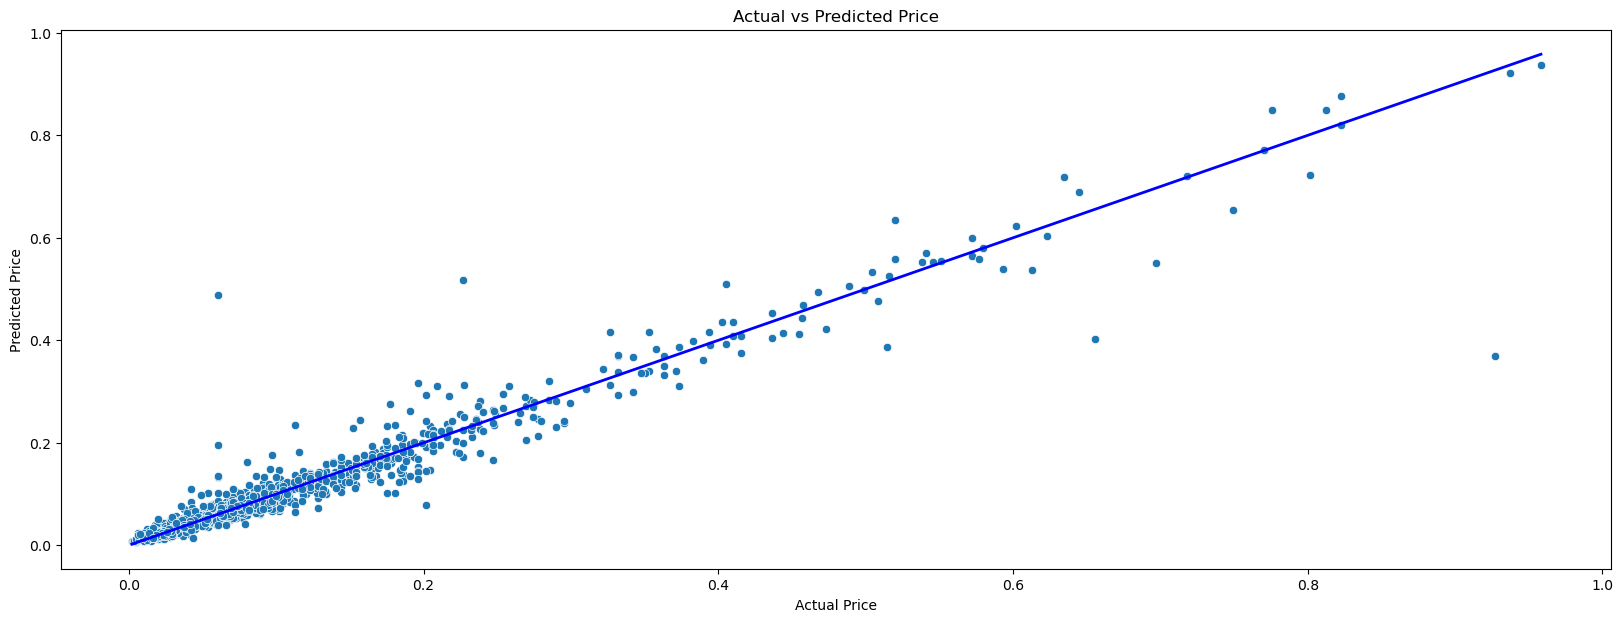

In [123]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=test_lab,y=gradient_testengg_predict)
plt.plot([test_lab.min(),test_lab.max()],[test_lab.min(),test_lab.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [129]:
Random_forest= pd.DataFrame({
    "Model": ["Random Forest"],
    "MSE": [0.000170],
    'MAE': [0.008907],
    "R2": [0.876508]
})
GradientFeature_Engineering=pd.DataFrame({
    "Model": ["Feature_Engineering_gradient Forest"],
    "MSE": [0.000756],     
    'MAE': [0.012264],
    "R2": [0.938653]
})

In [131]:
forest_comparison =pd.concat([Random_forest,GradientFeature_Engineering])

In [133]:
forest_comparison

,Model,MSE,MAE,R2
0,Random Forest,0.000170,0.008907,0.876508
0,Feature_Engineering_gradient Forest,0.000756,0.012264,0.938653


In [2586]:
#saving the model

In [213]:
model_filename = "C:\\Users\\admin\\python\\random_forest.joblib"

In [217]:
with open(model_filename, 'wb') as file:
    joblib.dump(random_model, file)

In [2602]:
sklearn.__version__  #file loads only with this versions

'1.4.2'

In [2606]:
pd.__version__

'2.2.2'

In [2608]:
np.__version__

'1.26.4'

In [219]:
trained_model = joblib.load("C:\\Users\\admin\\python\\random_forest.joblib")

In [221]:
trained_model.predict(test_data) 

array([0.04745842, 0.11056334, 0.1185927 , ..., 0.06007917, 0.07803461,
       0.04519116])

In [225]:
random_final=pd.DataFrame({
    "actual price":test_lab,
    "predicted price":random_test_predict 
})

In [227]:
random_final.head(50)

,actual price,predicted price
4238,0.043930,0.047458
1495,0.096018,0.110563
6675,0.110423,0.118593
4710,0.045600,0.045234
3588,0.039545,0.043356
5304,0.080882,0.086283
6795,0.076185,0.080561
3544,0.031299,0.050854
817,0.048001,0.046321
6069,0.112720,0.089585
